# Tutorial 5_Extension

By doing this extension, I want to achieve three things:

1) Understand better the SVC class from sci-kit learn, particularly with how the hyperbolic function is created (or in the case of Linear or RBF, how this is different!)

2) Use code from previous tutorials where necessary, and clean up items putting them in nice python files

# Libraries, files and other config

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# files 
from PythonFiles.datasets_huthwaite import gen_xor_distribution
from PythonFiles.datasets_huthwaite import gen_circular_distribution
from PythonFiles.plotting import plot_classes
from PythonFiles.plotting import gridspacer
from PythonFiles.plotting import reshape_by_component





## Redoing the lab but automating tasks

In [8]:
class PlotSVM(SVC):
    """ A class to extend the functionality of the SVC class from scikit learn
    by adding custom plotting functionality, as well as evaluation.
    
    In principle, one does not need to create a class for this, but part of my
    motivation in doing so was to practice.
    
    Note that I would like to add the following features:
    
    - Validation (such that by specifiying 5-10 paramters, you can create many
    models to tesdt)
    
    - Plotting (such that you can make very meaningful plots)
    
    Depenencies:
    ------------
    from PythonFiles.plotting import gridspacer
    
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def genXgrid(self, *parameters):
        self.lines, self.Xgrid, self.axes = gridspacer(*parameters)

    def plot(self, X, y,  **kwargs):
        
        fig, ax = plt.subplots(figsize = (8,8))
        
        if hasattr(self, 'Xgrid'):
            ax.contourf(
                *self.axes,
                reshape_by_component(
                    self.predict(self.Xgrid),
                    *self.axes
                )   
            )
        plot_classes(X,y, ax = ax)
        
        Z = reshape_by_component(svm.decision_function(self.Xgrid), *self.axes)
        ax.contour(*self.axes , Z, colors=['pink','blue','black'], levels=[-1, 0, 1],
        alpha=0.5, linestyles=['--', '-', '--']) # does this generalise for problems
        # with more classes?
        
        sv = self.support_vectors_
        ax.plot(sv[:,0], sv[:,1],'x', c='#000000')
        

## Generate the dataset


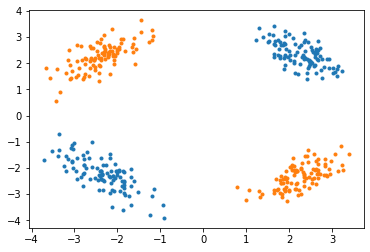

In [9]:
X,y = gen_xor_distribution(n = 400) # generate the circular distribution

plot_classes(X,y)


## Test your class for plotting

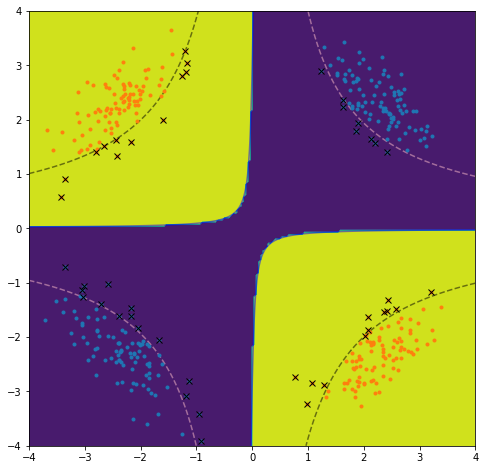

In [10]:
svm = PlotSVM(C = 0.1, gamma = 'scale', kernel='poly', degree = 2)
svm.fit(X,y)
svm.genXgrid([-4,4,200], [-4,4,200])
svm.plot(X,y)

Amazing! 

This was a good exercise for practice.

The next step now is to actually understanding the parameters and what impact they have on the plot.

## Experiment to understand what the SVM class is actually doing

An important question that I have: Why is there a hyperbolic / reciprocal curve that separates the two color coded regions? How does SVC determine this?

In [6]:
W = np.array([
    [1.3, -1, -3],
    [-2, 1, 2],
    [0.3, 0.1, -0.1],
    [0, -1, 1],
    [-0.2, 1.5, -1],
])

# NOTE: Xgrid needs to change!

Xgrid = create_grid(x1,x2)
print(Xgrid.shape)
print(np.ones([1,Xgrid.shape[1]]).shape)
Ygrid = np.concatenate([np.ones([1,Xgrid.shape[1]]), Xgrid])

Y = generalised_LDF(Ygrid, W, 1)

Y = reshape_by_component(Y,x1,x2)

plt.contourf(x1,x2,Y)

NameError: name 'create_grid' is not defined

# Higher order functions

In [ ]:
W = np.array([
    [1.3, -1, -3, -10],
    [-1, 1.5, 3, -1],
    [0.4, -0.1, -0.1, 3],
    [0.5, -1, 1, -0.1],
    [-0.2, 1.5, -1, 0.4],
])

Xgrid = create_grid(x1,x2)#
Ygrid = np.concatenate([
    np.ones([1,Xgrid.shape[1]]),
    Xgrid,
    (Xgrid[0,:] * Xgrid[1,:]).reshape(1,-1)
])


Y = generalised_LDF(Ygrid, W, 1)

Y = reshape_by_component(Y,x1,x2)

plt.contourf(x1,x2,Y)


# this is also correct, now let's try to design a class that will do all of this for us

# Creating a class...

In [11]:
class GeneralLDF:
    """
    
    A class for playing around with Generalised LDF functions
    
    
    Dependencies:
    -------------
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    Attributes:
    -----------
    W : np.array
        the weights array
    
    *x : np.array OR list
        the x1...xn coordinates of the problem
    
    **kwargs :
        feat1...featn : list
            creates extra polynomial features based on the *x coordinates.
            For instance: feat1 = [1,2] will create an extra feature of the form
            x1**1 * x2**2
    
    Methods:
    --------
    create_grid(self, *features) --> np.array
        creates plotting grids based on the input coordinates *x
    
    reshape_by_component(self, f) --> np.array
        reshapes function f by it's constitudent axes *x for plotting purposes
        
    calculate_g(self) --> np.array
        calculates classes based on the weights and Xgrid
    
    plot(self, Y, **kwargs) --> None
        plots a contourplot of the classes Y based on the coordinates x1 and x2
        NOTE: Currently no 3D plots possible
        
    """
    def __init__(self, W,*x, **kwargs):
        self.W = W
        self.x = x
        self.Xgrid = self.create_grid(*kwargs.values())

    
    def create_grid(self, *features):
        """
        
        Attributes:
        -----------
        
        *features : *list
            lists of features that define extra polynomial features to be added
            to Xgrid
    
        """
        p = 1
        for x in self.x:
            p *= len(x)
            
        grid = [*np.meshgrid(*self.x)]
        Xgrid = np.array(grid).reshape(len(grid),p)
        Xgrid = np.concatenate([
            np.ones([1, Xgrid.shape[1]]), Xgrid
        ])
        for feature in features:
            new_feature = np.ones([1,Xgrid.shape[1]])
            for i, power in enumerate(feature):
                new_feature *= Xgrid[i+1,:] ** power
            Xgrid = np.concatenate([
                Xgrid, new_feature.reshape(1,-1)   
            ])
        
        return Xgrid        

    def reshape_by_component(self, f):
        """
        
        Attributes:
        -----------
        
        f : np.array
            function f to be reshaped
            
        """
        return f.reshape(*[len(i) for i in self.x])
    
    def calculate_g(self):
        gs = []
        for w in self.W:
            gs.append(np.matmul(w, self.Xgrid))
        # define classes array
        Y = np.zeros([1, self.Xgrid.shape[1]])
        for i in range(len(gs)):
            Y_temp = np.ones([1, self.Xgrid.shape[1]])
            for j in range(len(gs)):
                Y_temp[0, gs[i] < gs[j]] = 0
            
            Y[Y_temp == 1] = i + 1
    
        return Y
    
    def plot(self, Y, **kwargs):
        """
        
        Attributes:
        -----------
        
        Y : np.array
            an array containing the correct classes for each point, x1, x2.
            
        **kwargs : 
            cmap : str
                a string containing the desired colormap to use for the contour plot
            
        """
        Y = reshape_by_component(Y,*self.x)
        ax, fig = plt.subplots(figsize = (10,8))
        plt.contourf(self.x[0],self.x[1],Y,
                     cmap=plt.cm.get_cmap(
                         'Set1' if 'cmap' not in kwargs else kwargs['cmap'],
                         len(np.unique(Y))+1))
        plt.colorbar(ticks= range(len(np.unique(Y))+1), label= 'classes')
        plt.clim(-0.5, 5.5)
        plt.title('a contour plot of the generalised linear discriminant function')
        plt.xlabel('x1')
        plt.ylabel('x2')

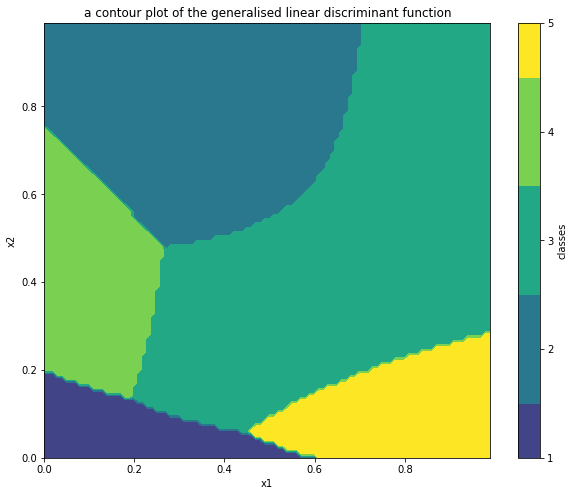

In [12]:
        
#x1 = np.linspace(0,1,200)
#x2 = np.linspace(0,1,200)
x1  = [i/100 for i in range(100)]
x2  = [i/100 for i in range(100)]
W = np.array([
    [1.3, -1, -3, -10],
    [-1, 1.5, 3, -1],
    [0.4, -0.1, -0.1, 3],
    [0.5, -1, 1, -0.1],
    [-0.2, 1.5, -1, 0.4],
])
model = GeneralLDF(W, x1, x2, feat1 = [1,1])
Y = model.calculate_g()
model.plot(Y, cmap = 'viridis')